### STEP-1 Reading the dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
import os
pd.set_option("display.float_format",lambda x : "%.2f" %x)
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir(r"C:\Users\RUCHIR\Desktop\UBER_FARE_PREDICTION\UBER_DATA")

In [3]:
start=time.time()
df_final=pd.DataFrame()

for i in os.listdir():
    df=pd.read_parquet(i, engine='pyarrow')
    df_final=pd.concat([df_final,df],axis=0,ignore_index=False)
print(time.time()-start)

164.38583040237427


In [4]:
df_final.shape

(52328835, 20)

# Bootstrap(Random sampling)

In [5]:
df_new=df_final.sample(frac=0.01)

In [6]:
df_new.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
728142,1,2022-08-08 11:33:24,2022-08-08 11:49:07,1.00,2.50,1.00,N,107,237,1,12.50,2.50,0.50,3.95,0.00,0.30,19.75,2.50,0.00,NaN
2146389,1,2022-02-22 10:33:32,2022-02-22 10:50:53,1.00,2.00,1.00,N,113,100,1,12.50,2.50,0.50,3.15,0.00,0.30,18.95,2.50,0.00,NaN
3322175,1,2022-04-29 18:10:00,2022-04-29 18:29:48,1.00,3.40,1.00,N,186,13,1,14.50,3.50,0.50,3.75,0.00,0.30,22.55,2.50,0.00,NaN
260984,2,2022-04-03 01:02:01,2022-04-03 01:09:50,1.00,1.28,1.00,N,162,230,2,7.50,0.50,0.50,0.00,0.00,0.30,11.30,2.50,0.00,NaN
692821,2,2022-03-07 07:23:02,2022-03-07 08:03:35,1.00,8.42,1.00,N,132,35,1,32.50,0.00,0.50,6.66,0.00,0.30,41.21,0.00,1.25,NaN


### STEP-2 Looking at the information about the dataset, datatypes of the coresponding columns and missing values

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523288 entries, 728142 to 2914745
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               523288 non-null  int64         
 1   tpep_pickup_datetime   523288 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  523288 non-null  datetime64[ns]
 3   passenger_count        506288 non-null  float64       
 4   trip_distance          523288 non-null  float64       
 5   RatecodeID             506288 non-null  float64       
 6   store_and_fwd_flag     506288 non-null  object        
 7   PULocationID           523288 non-null  int64         
 8   DOLocationID           523288 non-null  int64         
 9   payment_type           523288 non-null  int64         
 10  fare_amount            523288 non-null  float64       
 11  extra                  523288 non-null  float64       
 12  mta_tax                523288 non-null

### STEP-3 Find and Remove the Duplicate rows

In [8]:
df_new.duplicated().sum()

0

### STEP-4 Find NaN values

In [9]:
df_new.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           17000
trip_distance                 0
RatecodeID                17000
store_and_fwd_flag        17000
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      17000
airport_fee              111138
Airport_fee              429150
dtype: int64

In [10]:
df_final =df_new.reset_index(drop=True)

In [11]:
df_final['pick_hour'] = df_final['tpep_pickup_datetime'].dt.hour
df_final['pick_day'] = df_final['tpep_pickup_datetime'].dt.day
df_final['pick_month'] = df_final['tpep_pickup_datetime'].dt.month
df_final['pick_year'] = df_final['tpep_pickup_datetime'].dt.year
df_final['pick_weekday'] = df_final['tpep_pickup_datetime'].dt.weekday

df_final['tpep_dropoff_datetime'] = df_final['tpep_dropoff_datetime']
df_final['drop_hour'] = df_final['tpep_dropoff_datetime'].dt.hour
df_final['drop_day'] = df_final['tpep_dropoff_datetime'].dt.day
df_final['drop_month'] = df_final['tpep_dropoff_datetime'].dt.month
df_final['drop_year'] = df_final['tpep_dropoff_datetime'].dt.year
df_final['drop_weekday'] = df_final['tpep_dropoff_datetime'].dt.weekday

In [12]:
df_final['tot_mins_diff'] = (df_final['tpep_dropoff_datetime'] - df_final['tpep_pickup_datetime']) / pd.Timedelta(minutes=1)

# STEP-5 Deleting Unnnecessary Columns

In [13]:
df_final.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee',
       'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
       'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday',
       'tot_mins_diff'],
      dtype='object')

In [14]:
uncol=['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime','RatecodeID', 'store_and_fwd_flag','Airport_fee']
df_final.drop(uncol,axis=1,inplace=True)

In [15]:

pd.set_option("display.max_columns",None)

In [16]:
df_final.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pick_hour', 'pick_day',
       'pick_month', 'pick_year', 'pick_weekday', 'drop_hour', 'drop_day',
       'drop_month', 'drop_year', 'drop_weekday', 'tot_mins_diff'],
      dtype='object')

In [17]:
df_final.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,tot_mins_diff
0,1.00,2.50,107,237,1,12.50,2.50,0.50,3.95,0.00,0.30,19.75,2.50,0.00,11,8,8,2022,0,11,8,8,2022,0,15.72
1,1.00,2.00,113,100,1,12.50,2.50,0.50,3.15,0.00,0.30,18.95,2.50,0.00,10,22,2,2022,1,10,22,2,2022,1,17.35
2,1.00,3.40,186,13,1,14.50,3.50,0.50,3.75,0.00,0.30,22.55,2.50,0.00,18,29,4,2022,4,18,29,4,2022,4,19.80
3,1.00,1.28,162,230,2,7.50,0.50,0.50,0.00,0.00,0.30,11.30,2.50,0.00,1,3,4,2022,6,1,3,4,2022,6,7.82
4,1.00,8.42,132,35,1,32.50,0.00,0.50,6.66,0.00,0.30,41.21,0.00,1.25,7,7,3,2022,0,8,7,3,2022,0,40.55


In [18]:
unpaycol=['fare_amount', 'extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge',"congestion_surcharge","airport_fee"]
df_final.drop(unpaycol,axis=1,inplace=True)

In [19]:
df_final.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,tot_mins_diff
0,1.00,2.50,107,237,1,19.75,11,8,8,2022,0,11,8,8,2022,0,15.72
1,1.00,2.00,113,100,1,18.95,10,22,2,2022,1,10,22,2,2022,1,17.35
2,1.00,3.40,186,13,1,22.55,18,29,4,2022,4,18,29,4,2022,4,19.80
3,1.00,1.28,162,230,2,11.30,1,3,4,2022,6,1,3,4,2022,6,7.82
4,1.00,8.42,132,35,1,41.21,7,7,3,2022,0,8,7,3,2022,0,40.55


In [20]:
df_final.loc[df_final["total_amount"]<0]

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,tot_mins_diff
22,1.00,0.00,132,264,3,-5.05,0,3,7,2022,6,0,3,7,2022,6,0.30
64,1.00,1.17,237,236,4,-10.80,15,3,12,2022,5,15,3,12,2022,5,8.45
144,1.00,0.14,231,231,4,-6.80,2,4,12,2022,6,2,4,12,2022,6,1.47
180,1.00,7.73,138,141,2,-44.55,15,15,4,2023,5,16,15,4,2023,5,24.85
189,2.00,0.00,132,132,4,-5.05,20,5,9,2022,0,20,5,9,2022,0,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522175,1.00,0.92,142,48,4,-10.30,19,30,6,2022,3,19,30,6,2022,3,5.80
522320,1.00,7.94,132,135,4,-25.05,16,21,8,2022,6,16,21,8,2022,6,17.88
522503,1.00,1.80,161,236,4,-14.80,9,3,2,2022,3,9,3,2,2022,3,16.25
523042,1.00,0.68,48,230,3,-10.80,5,16,3,2023,3,5,16,3,2023,3,4.00


In [21]:
df_final=df_final.loc[df_final["total_amount"]>0]

In [22]:
df_uber=df_final.reset_index(drop=True)

### STEP-5 EDA

Q-1)What is the busiest day of the week?

Q-2)What is the busiest time of the day?

Q-3)In which month are fares the highest?

Q-4)Which pickup locations have the highest fares?

Q-5)Which drop locations have the highest fares?

Q-6)What is the average ride distance?

Q-7)Passenger count vs totat fare?

Q-8)Toatal distance vs total fare?

# DATA VISUALISATION

# No. of passenger count

In [23]:
df_uber["passenger_count"].value_counts()

1.00    373334
2.00     76306
3.00     19629
0.00      9816
4.00      9206
5.00      8564
6.00      5659
8.00         1
Name: passenger_count, dtype: int64

In [24]:
df_uber=df_uber.loc[~(df_uber["passenger_count"]==0)]

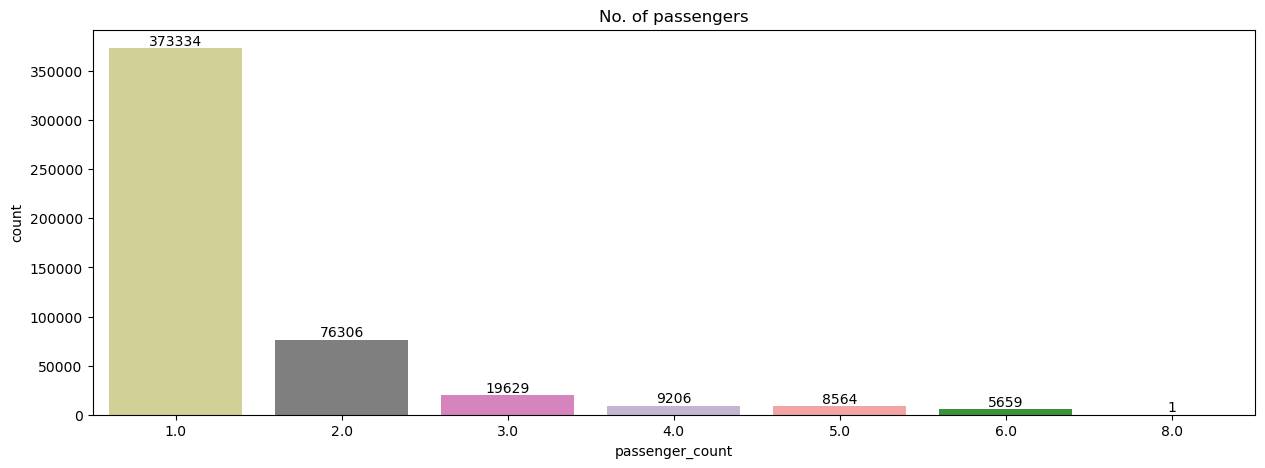

In [25]:
a=plt.figure(figsize=(15,5))
ax=sns.countplot(df_uber,x='passenger_count',palette="tab20_r")
plt.title('No. of passengers')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# No. of Payment mode

In [26]:
df_uber=df_uber.loc[~(df_uber["payment_type"]==0)]

In [27]:
df_uber["payment_type"].value_counts(dropna=False)

1    393373
2     95841
3      1758
4      1727
Name: payment_type, dtype: int64

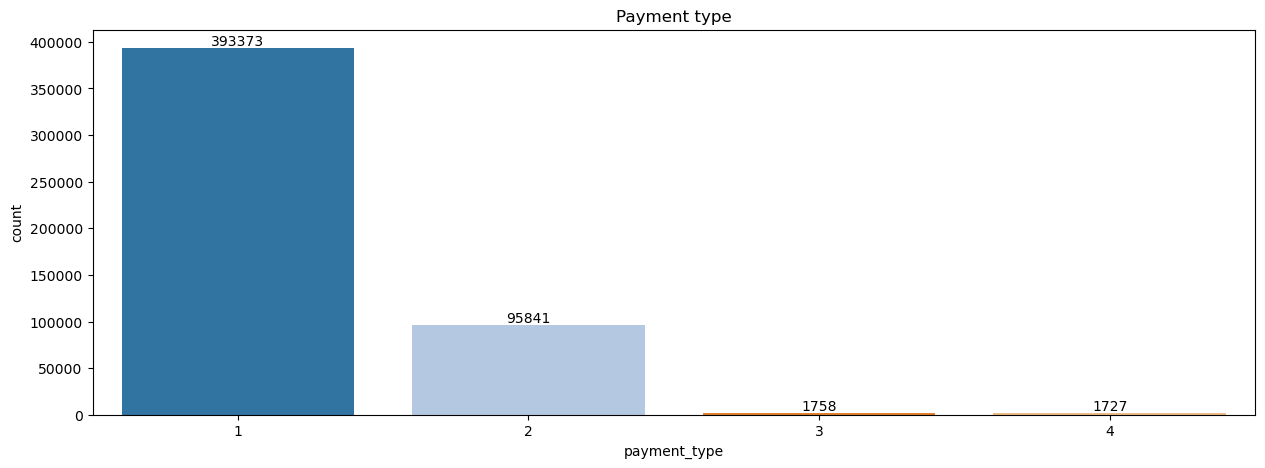

In [28]:
a=plt.figure(figsize=(15,5))
ax=sns.countplot(df_uber,x='payment_type',palette="tab20")
plt.title('Payment type')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [29]:
df_uber.loc[df_uber["payment_type"]==3]

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,tot_mins_diff
361,3.00,3.30,48,238,3,16.30,18,24,7,2022,6,18,24,7,2022,6,11.87
706,1.00,0.00,107,107,3,41.00,0,2,4,2023,6,0,2,4,2023,6,3.00
1001,1.00,0.40,142,143,3,7.80,9,20,3,2022,6,9,20,3,2022,6,4.22
1066,1.00,0.74,186,234,3,9.30,2,21,10,2022,4,3,21,10,2022,4,5.75
1627,1.00,0.10,74,74,3,5.80,17,7,10,2022,4,17,7,10,2022,4,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518589,1.00,18.40,132,132,3,4.55,14,9,5,2022,0,14,9,5,2022,0,0.07
518676,1.00,13.80,48,243,3,46.30,4,26,8,2022,4,5,26,8,2022,4,35.33
518697,2.00,0.00,145,145,3,3.30,14,22,6,2022,2,14,22,6,2022,2,0.43
518775,1.00,0.32,229,229,3,6.80,1,8,10,2022,5,1,8,10,2022,5,1.10


In [30]:
df_uber=df_uber.loc[~(df_uber["payment_type"]==3)]

In [31]:
df_uber.reset_index(drop=True,inplace=True)

In [32]:
df_uber=df_uber.loc[~(df_uber["payment_type"]==4)]

# Top 10 pickup location

In [33]:
df_uber["PULocationID"].nunique()

247

In [34]:
top10_pickuploc=[i for i in df_uber["PULocationID"].value_counts().head(10).index]

In [35]:
df_top10pick=df_uber.loc[df_uber["PULocationID"].isin(top10_pickuploc)]

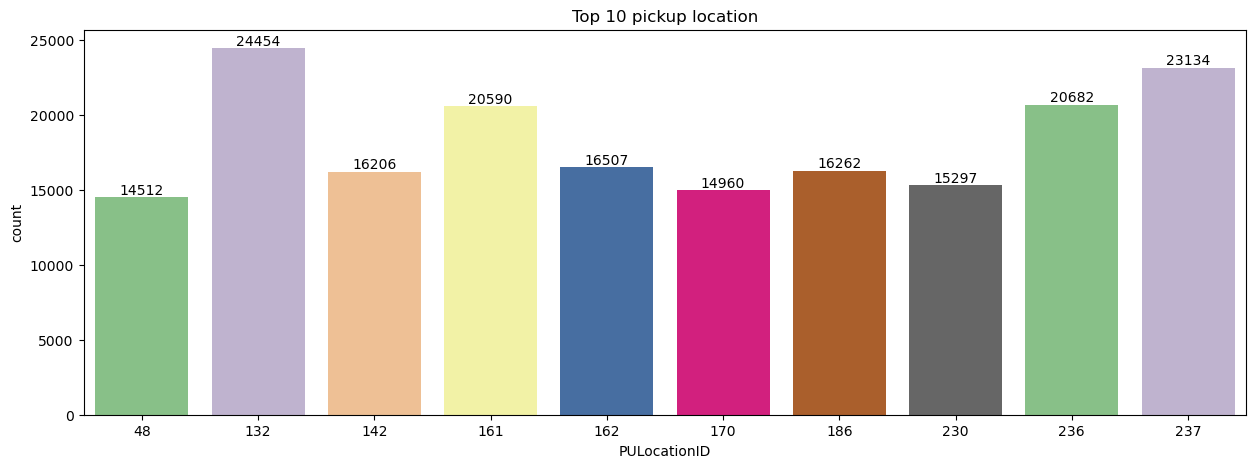

In [36]:
a=plt.figure(figsize=(15,5))
ax=sns.countplot(df_top10pick,x='PULocationID',palette="Accent")
plt.title('Top 10 pickup location')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Top 10 Drop location

In [37]:
df_uber["DOLocationID"].nunique()

260

In [38]:
top10_droploc=[i for i in df_uber["DOLocationID"].value_counts().head(10).index]

In [39]:
df_top10drop=df_uber.loc[df_uber["DOLocationID"].isin(top10_droploc)]

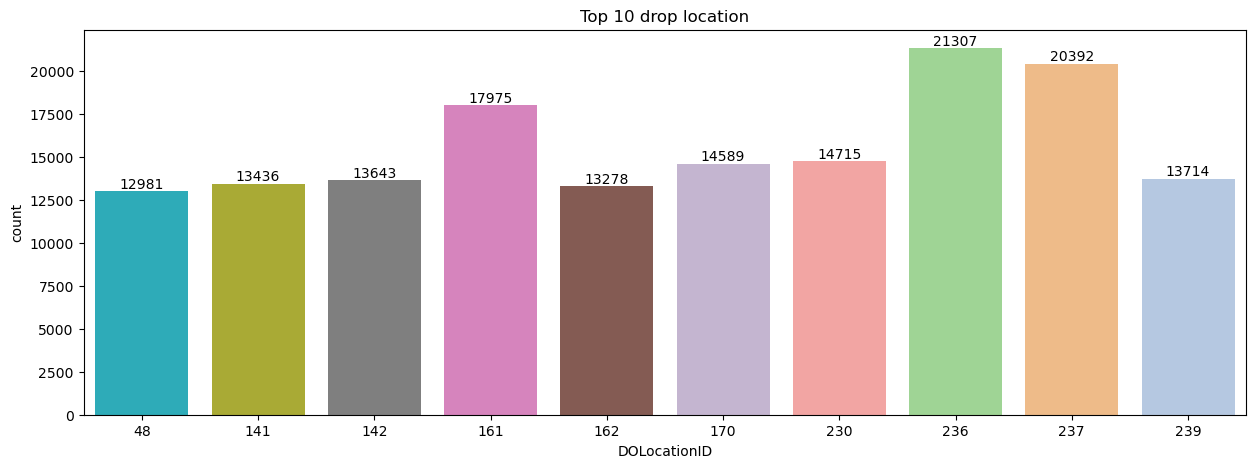

In [40]:
a=plt.figure(figsize=(15,5))
ax=sns.countplot(df_top10drop,x='DOLocationID',palette="tab20_r")
plt.title('Top 10 drop location')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [41]:
df_uber["pick_hour"].value_counts()

18    34486
17    33309
19    31114
16    30606
15    30450
14    30166
13    28012
20    27486
12    27164
21    26542
11    25395
22    24319
10    23434
9     20851
23    19269
8     18472
7     13563
0     13473
1      8871
6      7054
2      5960
3      3877
5      2861
4      2480
Name: pick_hour, dtype: int64

# Fare distribution as per passenger count

In [42]:
df_uber["passenger_count"].unique()

array([1., 6., 2., 3., 4., 5., 8.])

In [43]:

df_uber=df_uber.loc[~(df_uber["passenger_count"].isin([7., 8.,9.]))]

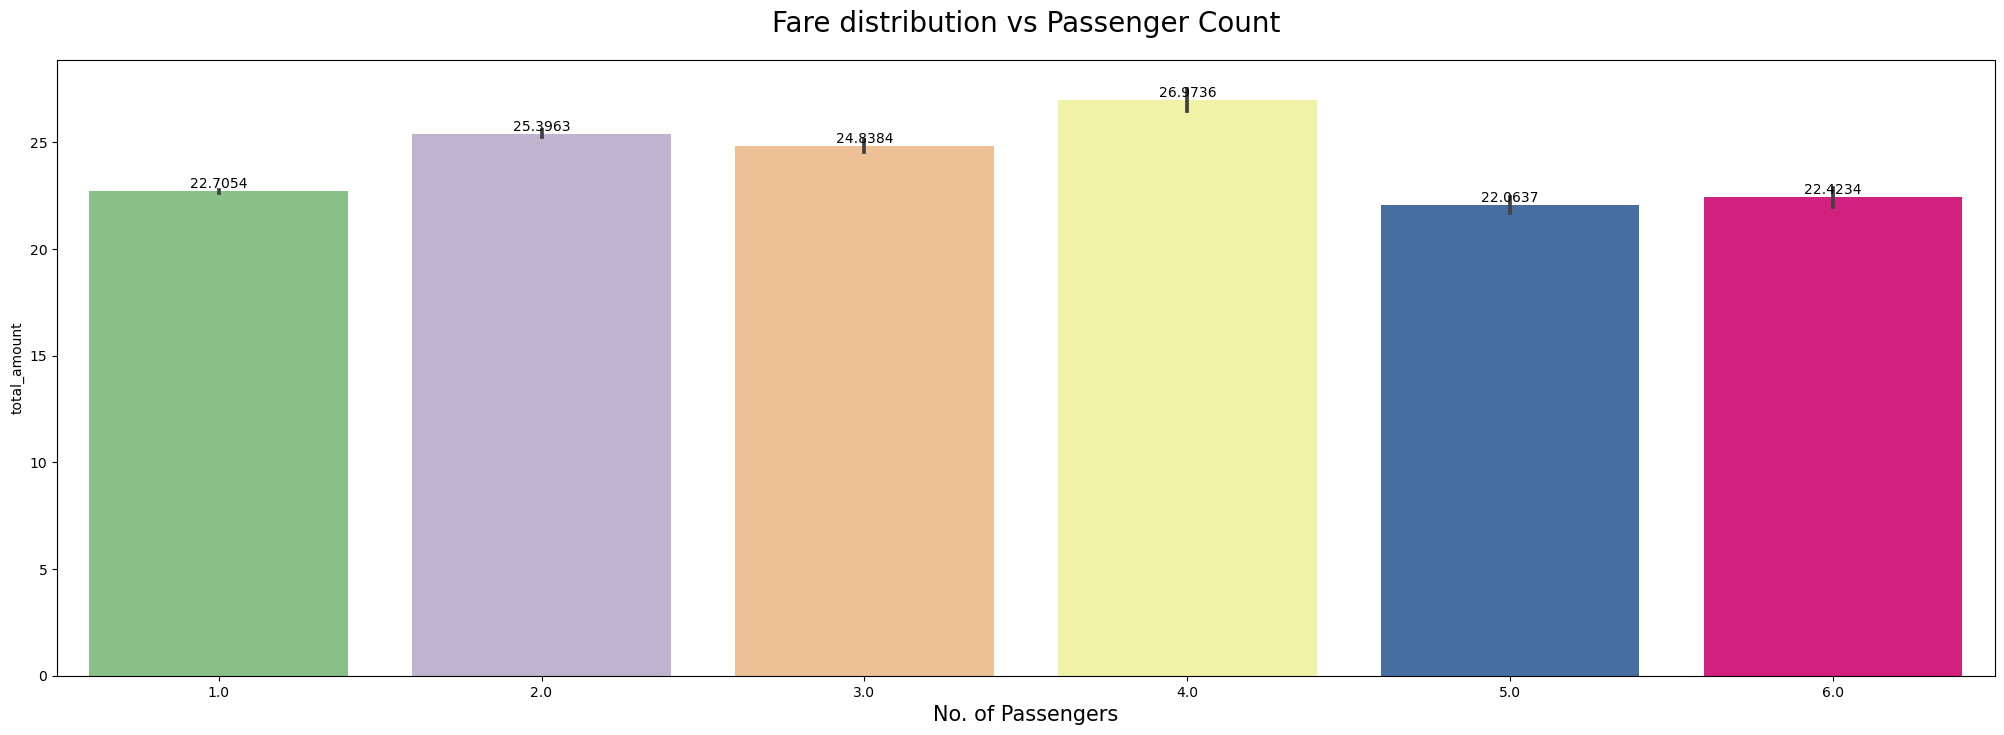

In [44]:
b=plt.figure(figsize=(25,8))

ax=sns.barplot(y=df_uber["total_amount"],x=df_uber["passenger_count"],palette='Accent',estimator="mean")
plt.title("Fare distribution vs Passenger Count",size=20,pad=20)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("No. of Passengers",size=15)
plt.show()

# Fare distribution as per top 10 pick up locations 

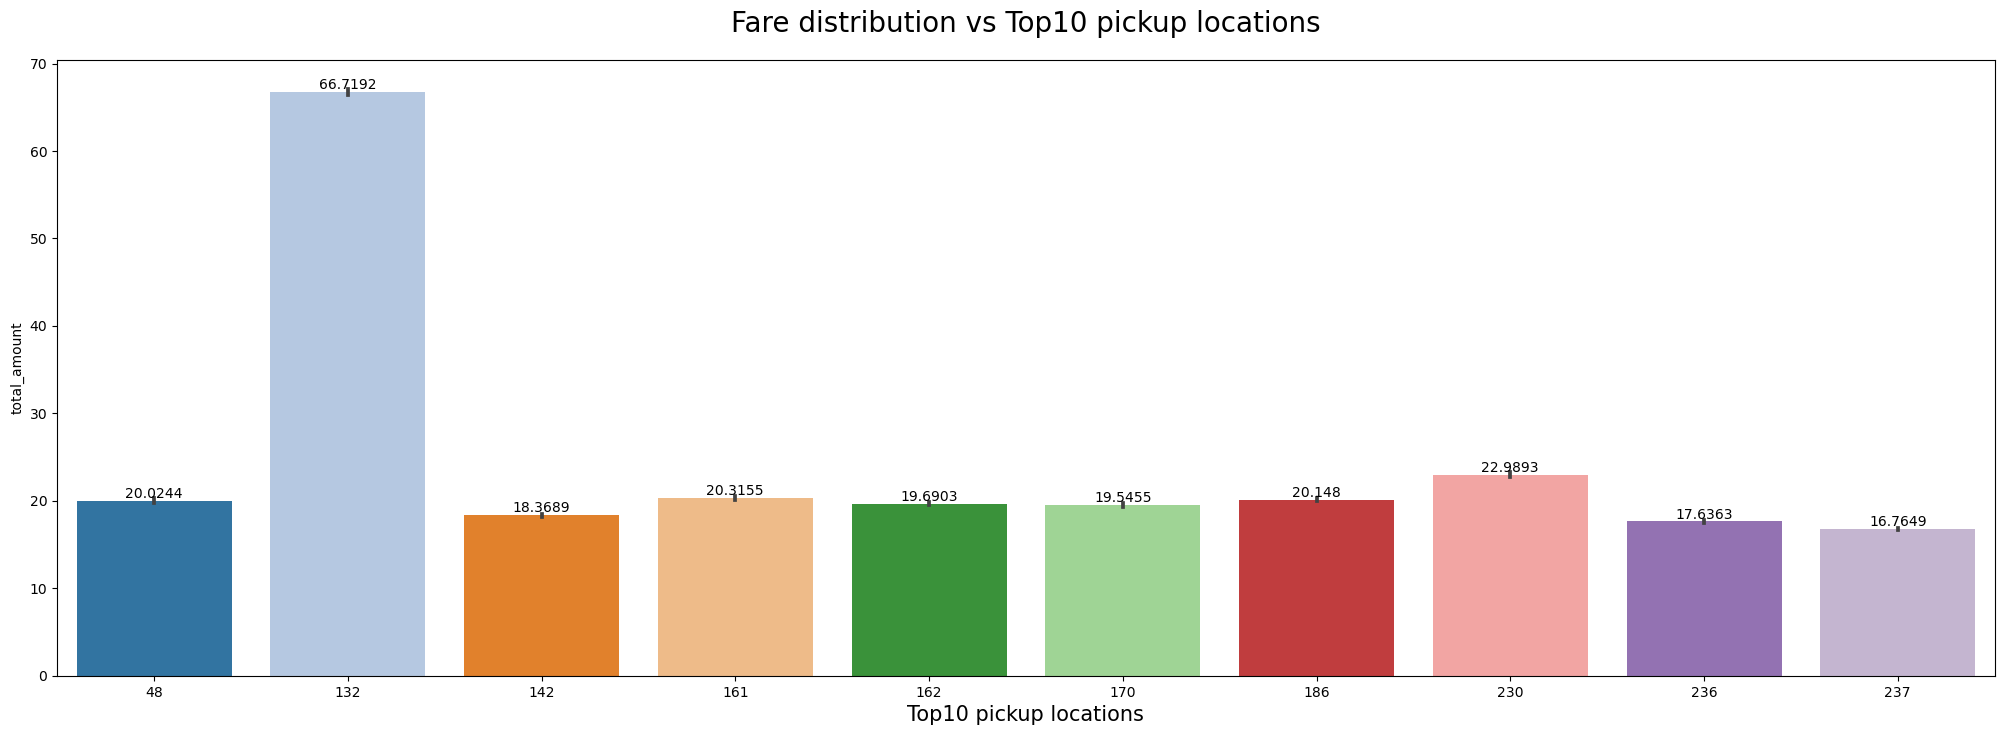

In [45]:
b=plt.figure(figsize=(25,8))

ax=sns.barplot(y=df_top10pick["total_amount"],x=df_top10pick["PULocationID"],palette='tab20',estimator="mean")
plt.title("Fare distribution vs Top10 pickup locations",size=20,pad=20)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Top10 pickup locations",size=15)
plt.show()

In [46]:
df_top10pick.loc[df_top10pick["PULocationID"]==132]

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,tot_mins_diff
4,1.00,8.42,132,35,1,41.21,7,7,3,2022,0,8,7,3,2022,0,40.55
27,1.00,17.82,132,68,1,75.72,21,15,4,2022,4,22,15,4,2022,4,41.03
61,2.00,18.60,132,143,1,66.55,23,1,11,2022,1,23,1,11,2022,1,43.73
80,2.00,17.87,132,42,1,84.30,14,1,1,2023,6,15,1,1,2023,6,40.40
93,1.00,21.70,132,163,1,96.80,16,30,12,2022,4,17,30,12,2022,4,68.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490877,2.00,17.90,132,161,1,82.00,11,16,12,2022,4,12,16,12,2022,4,64.20
490902,1.00,12.10,132,62,2,60.75,18,15,2,2023,2,19,15,2,2023,2,43.78
490909,1.00,0.00,132,132,1,33.80,17,12,2,2023,6,17,12,2,2023,6,0.10
490911,3.00,20.25,132,238,1,75.72,15,25,4,2022,0,16,25,4,2022,0,57.28


# Fare distribution as per top 10 drop locations

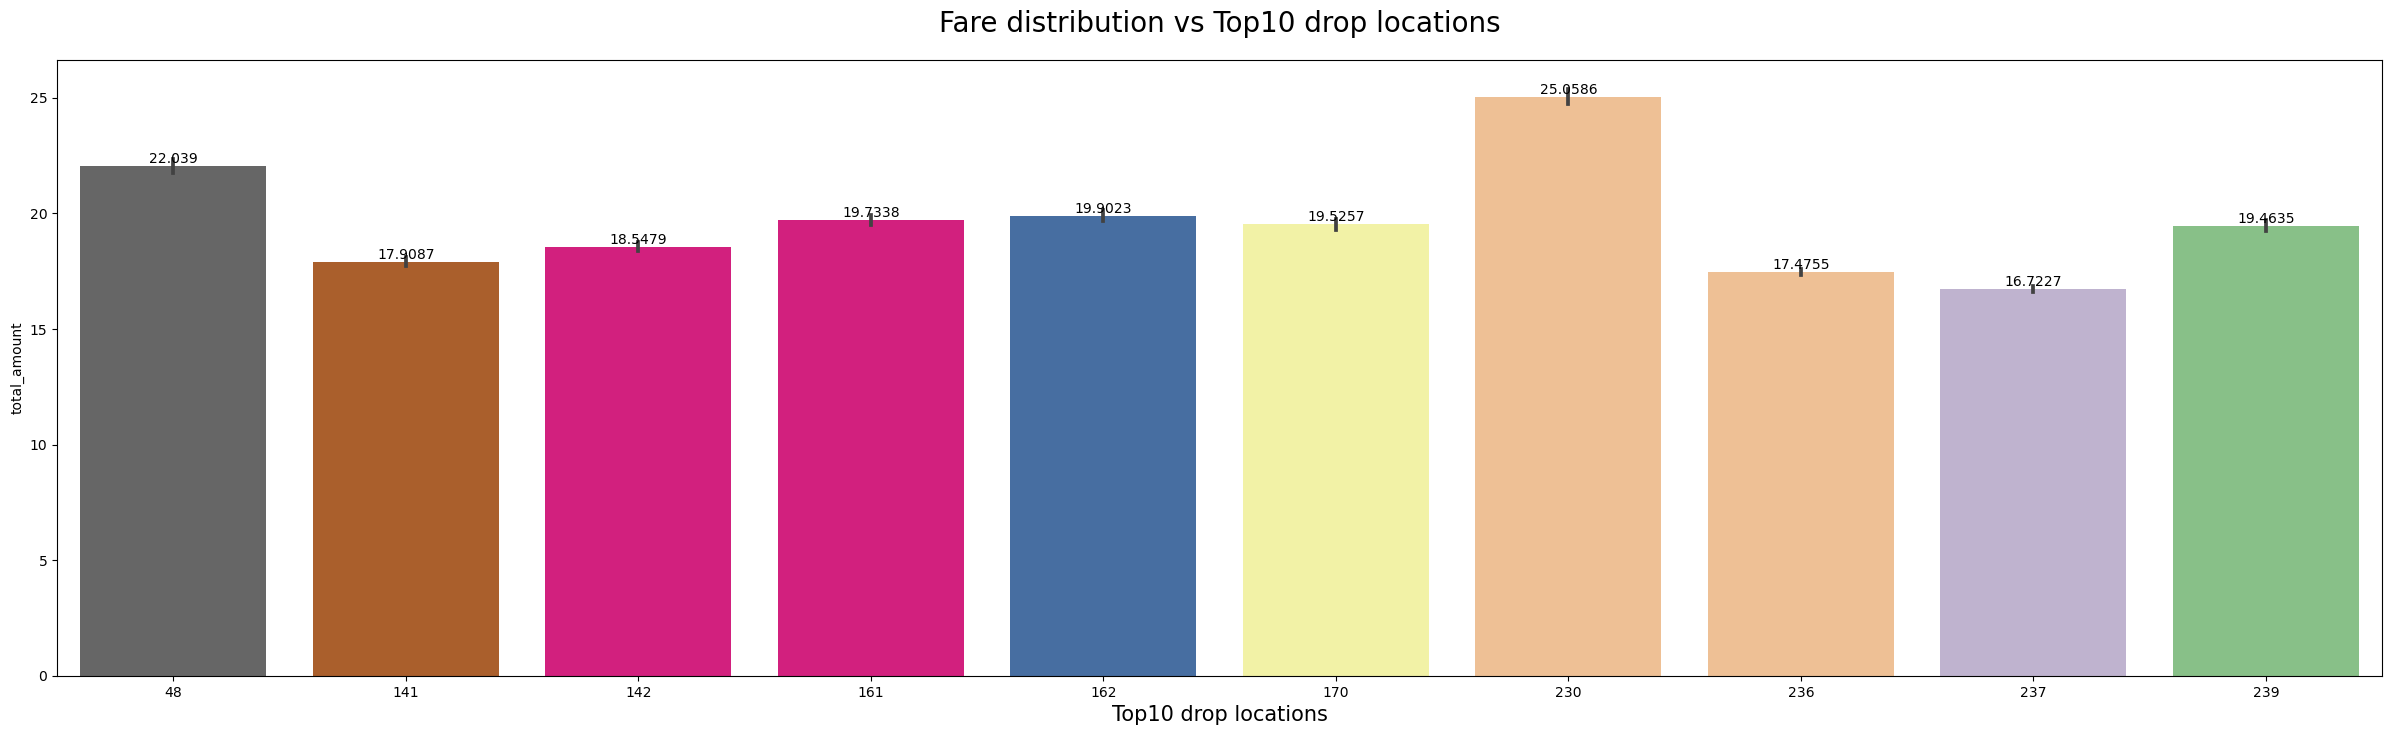

In [47]:
b=plt.figure(figsize=(30,8))

ax=sns.barplot(y=df_top10drop["total_amount"],x=df_top10drop["DOLocationID"],palette='Accent_r',estimator="mean")
plt.title("Fare distribution vs Top10 drop locations",size=20,pad=20)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Top10 drop locations",size=15)
plt.show()

# Fare distribution as per month

In [48]:
df_uber.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount', 'pick_hour', 'pick_day', 'pick_month',
       'pick_year', 'pick_weekday', 'drop_hour', 'drop_day', 'drop_month',
       'drop_year', 'drop_weekday', 'tot_mins_diff'],
      dtype='object')

In [49]:
data_fare=pd.DataFrame(df_uber.groupby('pick_month')["total_amount"].sum()).reset_index()

In [50]:
data_fare

,pick_month,total_amount
0,1,1237621.28
1,2,1294026.11
2,3,1613253.53
3,4,1605915.20
4,5,734961.32
5,6,728495.18
6,7,631041.39
7,8,643200.69
8,9,673334.68
9,10,767501.42


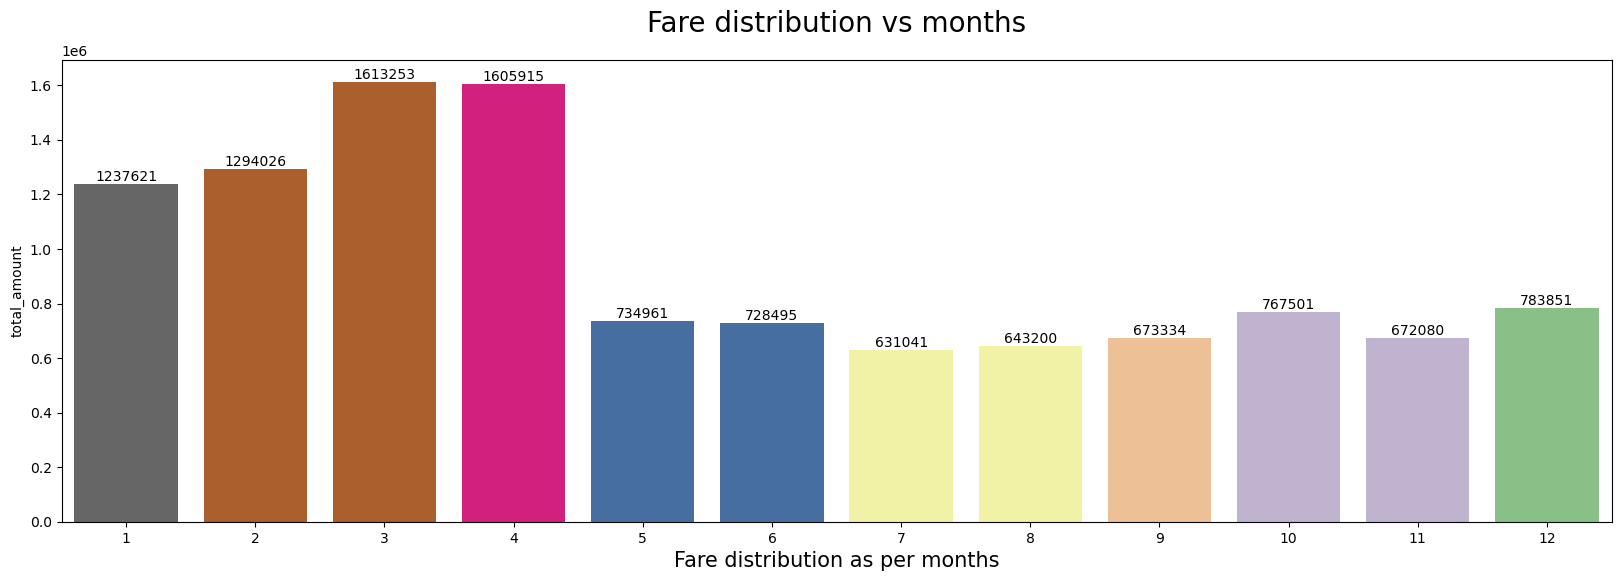

In [51]:
b=plt.figure(figsize=(20,6))

ax=sns.barplot(y=data_fare["total_amount"],x=data_fare["pick_month"],palette='Accent_r',estimator="sum")
plt.title("Fare distribution vs months",size=20,pad=20)
for container in ax.containers:
    ax.bar_label(container,fmt='%d')
plt.xlabel("Fare distribution as per months",size=15)
plt.show()

# Fare distribution as per peak hours

In [52]:
df_uber.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,tot_mins_diff
0,1.00,2.50,107,237,1,19.75,11,8,8,2022,0,11,8,8,2022,0,15.72
1,1.00,2.00,113,100,1,18.95,10,22,2,2022,1,10,22,2,2022,1,17.35
2,1.00,3.40,186,13,1,22.55,18,29,4,2022,4,18,29,4,2022,4,19.80
3,1.00,1.28,162,230,2,11.30,1,3,4,2022,6,1,3,4,2022,6,7.82
4,1.00,8.42,132,35,1,41.21,7,7,3,2022,0,8,7,3,2022,0,40.55


In [53]:
data_fare=pd.DataFrame(df_uber.groupby('pick_hour')["total_amount"].sum().reset_index())

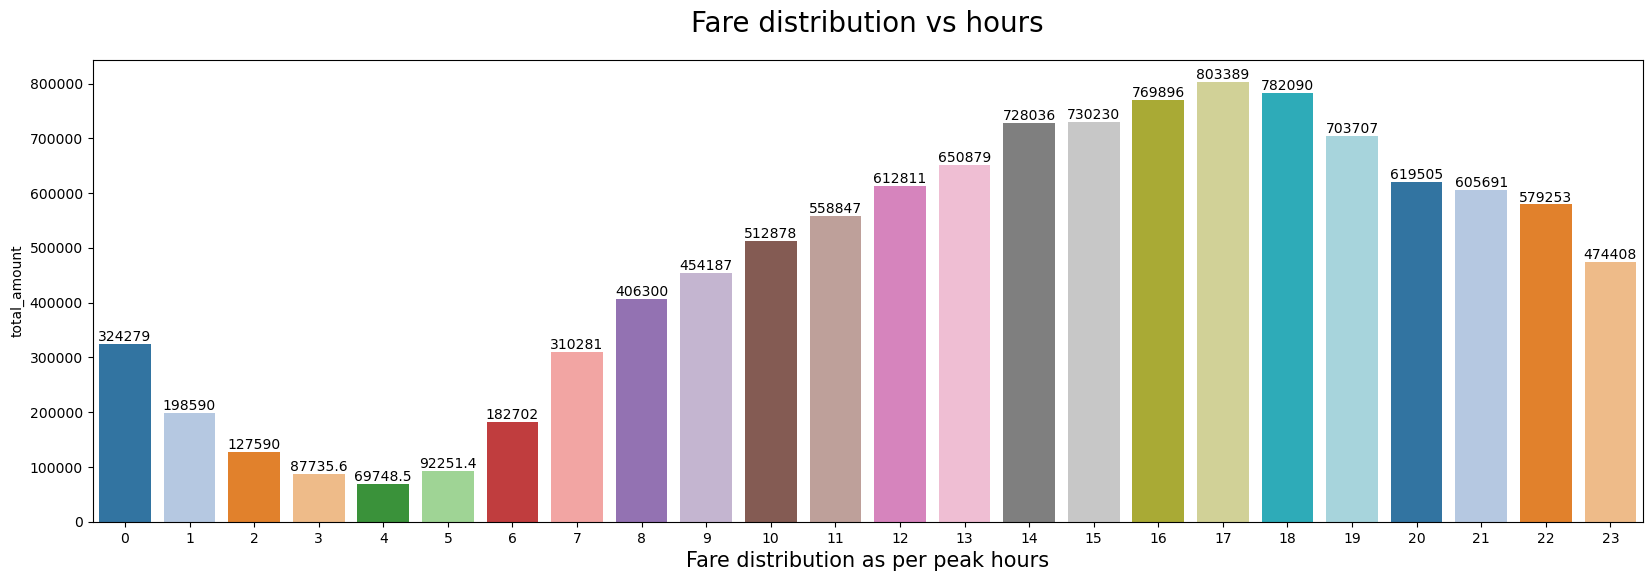

In [54]:
b=plt.figure(figsize=(20,6))

ax=sns.barplot(y=data_fare["total_amount"],x=data_fare["pick_hour"],palette='tab20',estimator="mean")
plt.title("Fare distribution vs hours",size=20,pad=20)
for container in ax.containers:
    ax.bar_label(container,)
plt.xlabel("Fare distribution as per peak hours",size=15)
plt.show()

# Fare distribution as per week day

In [55]:
data_fare=pd.DataFrame(df_uber.groupby('pick_weekday')["total_amount"].sum()).reset_index()

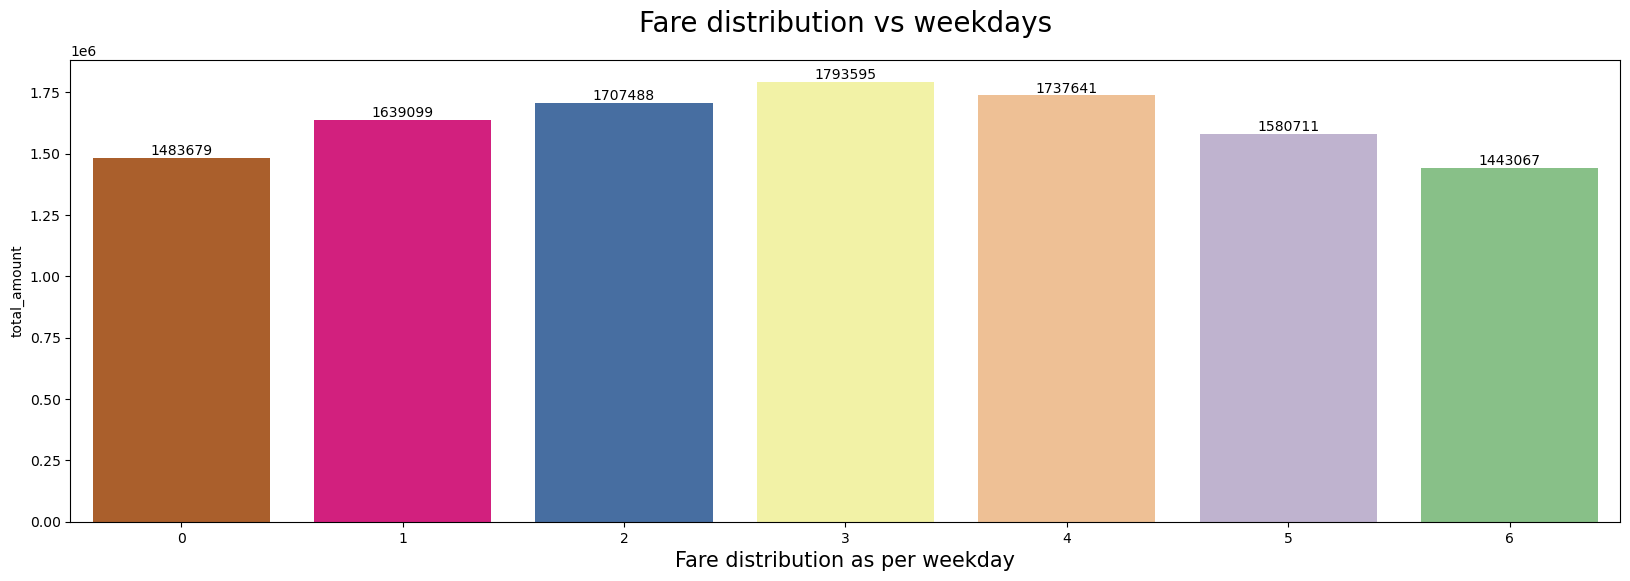

In [56]:
b=plt.figure(figsize=(20,6))

ax=sns.barplot(y=data_fare["total_amount"],x=data_fare["pick_weekday"],palette='Accent_r',estimator="sum")
plt.title("Fare distribution vs weekdays",size=20,pad=20)
for container in ax.containers:
    ax.bar_label(container,fmt='%d')
plt.xlabel("Fare distribution as per weekday",size=15)
plt.show()

# Fare distribution vs journey total time

In [57]:
df_uber.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,tot_mins_diff
0,1.00,2.50,107,237,1,19.75,11,8,8,2022,0,11,8,8,2022,0,15.72
1,1.00,2.00,113,100,1,18.95,10,22,2,2022,1,10,22,2,2022,1,17.35
2,1.00,3.40,186,13,1,22.55,18,29,4,2022,4,18,29,4,2022,4,19.80
3,1.00,1.28,162,230,2,11.30,1,3,4,2022,6,1,3,4,2022,6,7.82
4,1.00,8.42,132,35,1,41.21,7,7,3,2022,0,8,7,3,2022,0,40.55


In [58]:
df_uber["total_time_hrs"]=df_uber["tot_mins_diff"]/60

In [59]:
df_uber["total_time_hrs"]

0        0.26
1        0.29
2        0.33
3        0.13
4        0.68
         ... 
490936   0.28
490937   0.21
490938   0.15
490939   0.17
490940   0.31
Name: total_time_hrs, Length: 489213, dtype: float64

In [60]:
df_uber["time_analysis"]=df_uber["total_time_hrs"].apply(lambda x : "more than 30 mins" if x>.5 else "less than 30 mins")

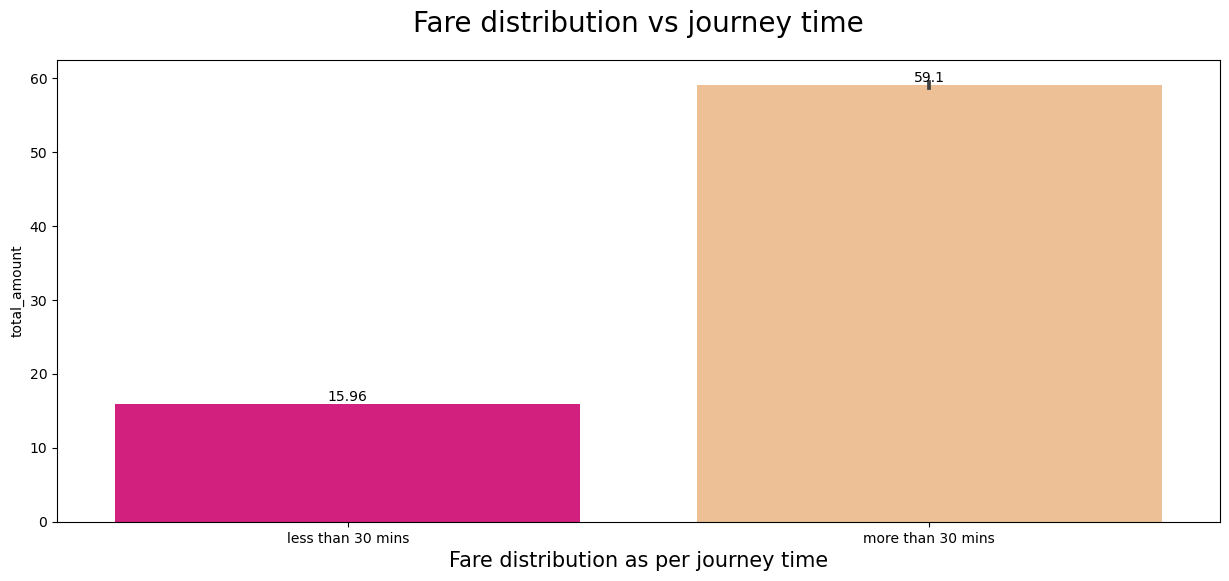

In [61]:
b=plt.figure(figsize=(15,6))

ax=sns.barplot(y=df_uber["total_amount"],x=df_uber["time_analysis"],palette='Accent_r',estimator="median")
plt.title("Fare distribution vs journey time",size=20,pad=20)
for container in ax.containers:
    ax.bar_label(container,)
plt.xlabel("Fare distribution as per journey time",size=15)
plt.show()

In [62]:
df_uber.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount', 'pick_hour', 'pick_day', 'pick_month',
       'pick_year', 'pick_weekday', 'drop_hour', 'drop_day', 'drop_month',
       'drop_year', 'drop_weekday', 'tot_mins_diff', 'total_time_hrs',
       'time_analysis'],
      dtype='object')

# Fare distribution vs Trip_distance

In [63]:
df_uber.shape

(489213, 19)

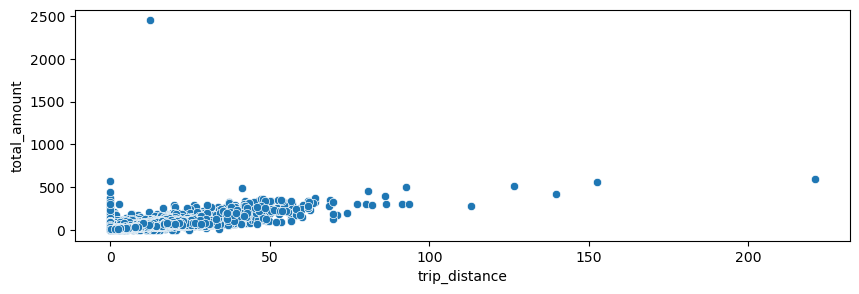

In [64]:
plt.figure(figsize=(10,3))
sns.scatterplot(df_uber,x="trip_distance",y="total_amount")
plt.show()

In [65]:
df_uber=df_uber.loc[~(df_uber["trip_distance"]==0)]

In [66]:
df_uber=df_uber.loc[df_uber["trip_distance"]<80]

In [67]:
df_uber=df_uber.loc[df_uber["total_amount"]<1000]

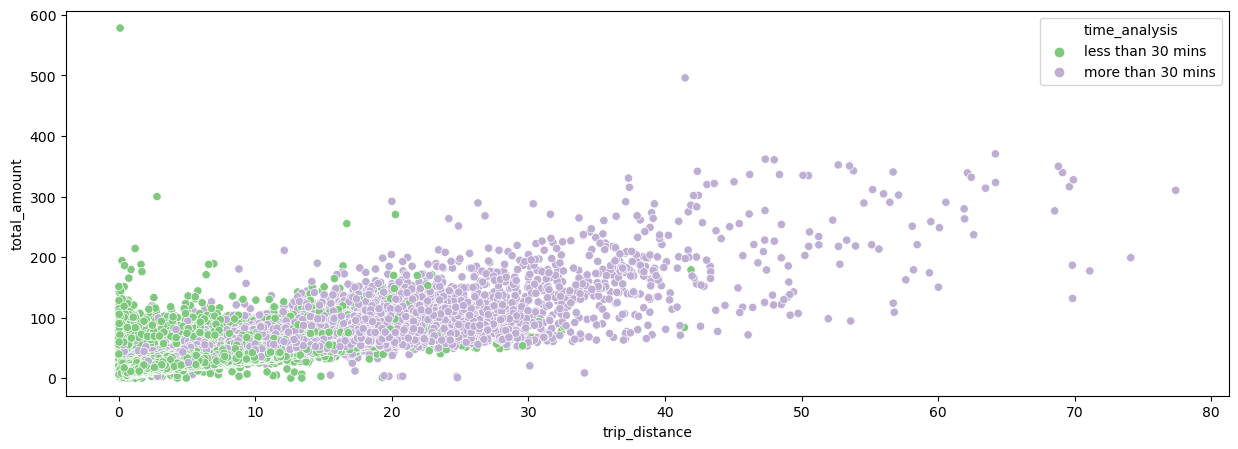

In [68]:
plt.figure(figsize=(15,5))
sns.scatterplot(df_uber,x="trip_distance",y="total_amount",hue='time_analysis',palette="Accent")
plt.show()

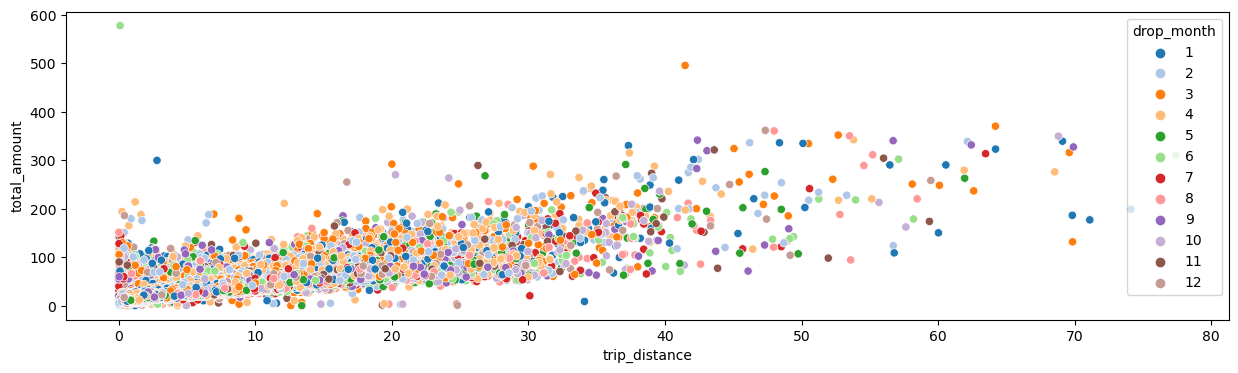

In [69]:
plt.figure(figsize=(15,4))
sns.scatterplot(df_uber,x="trip_distance",y="total_amount",hue='drop_month',palette="tab20")
plt.show()

# Total distance travelled vs Journey time

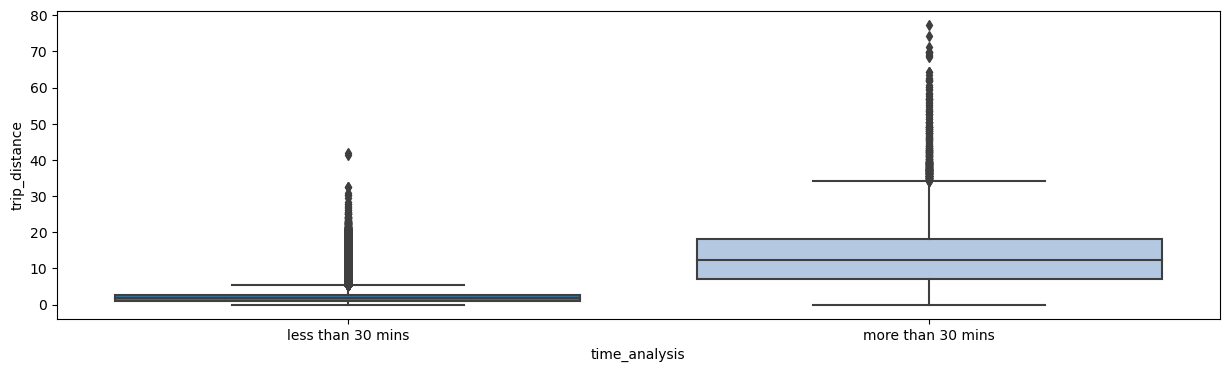

In [70]:
plt.figure(figsize=(15,4))
sns.boxplot(df_uber,y="trip_distance",x='time_analysis',palette="tab20")
plt.show()

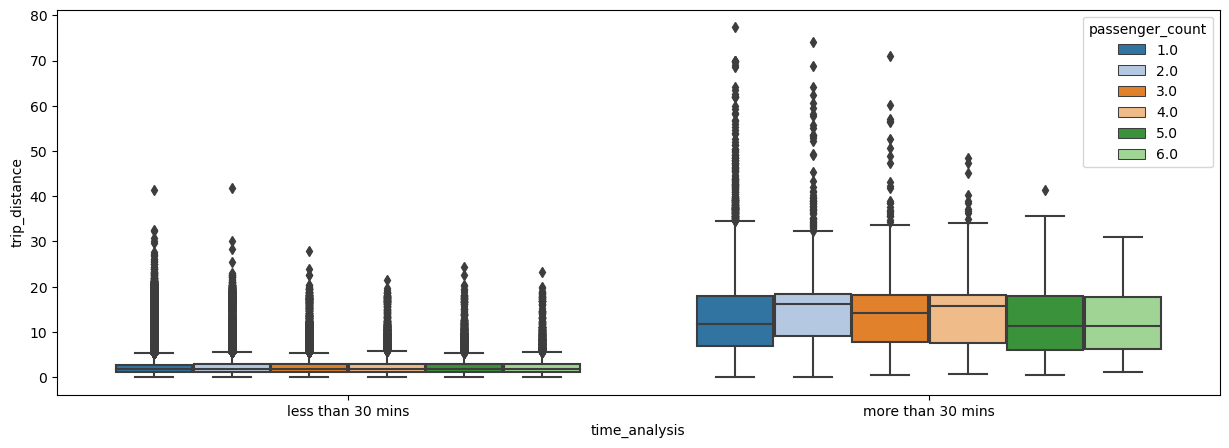

In [71]:
plt.figure(figsize=(15,5))
sns.boxplot(df_uber,y="trip_distance",x=df_uber['time_analysis'],hue="passenger_count",palette="tab20")
plt.show()

# Feature Engineering

In [72]:
df_uber.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount', 'pick_hour', 'pick_day', 'pick_month',
       'pick_year', 'pick_weekday', 'drop_hour', 'drop_day', 'drop_month',
       'drop_year', 'drop_weekday', 'tot_mins_diff', 'total_time_hrs',
       'time_analysis'],
      dtype='object')

In [73]:
df_uber["payment_type"].value_counts()

1    389799
2     94229
Name: payment_type, dtype: int64

In [74]:
top2_payment=[i for i in df_uber["payment_type"].value_counts().head(2).index]

In [75]:
for i,j in zip(top2_payment,["cash","creditcard"]):
    df_uber[j+str(i)]=np.where(df_uber["payment_type"]==i,1,0)

In [76]:
df_uber.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,tot_mins_diff,total_time_hrs,time_analysis,cash1,creditcard2
0,1.00,2.50,107,237,1,19.75,11,8,8,2022,0,11,8,8,2022,0,15.72,0.26,less than 30 mins,1,0
1,1.00,2.00,113,100,1,18.95,10,22,2,2022,1,10,22,2,2022,1,17.35,0.29,less than 30 mins,1,0
2,1.00,3.40,186,13,1,22.55,18,29,4,2022,4,18,29,4,2022,4,19.80,0.33,less than 30 mins,1,0
3,1.00,1.28,162,230,2,11.30,1,3,4,2022,6,1,3,4,2022,6,7.82,0.13,less than 30 mins,0,1
4,1.00,8.42,132,35,1,41.21,7,7,3,2022,0,8,7,3,2022,0,40.55,0.68,more than 30 mins,1,0


# Delete irrelevant features first

In [77]:
df_uber

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,tot_mins_diff,total_time_hrs,time_analysis,cash1,creditcard2
0,1.00,2.50,107,237,1,19.75,11,8,8,2022,0,11,8,8,2022,0,15.72,0.26,less than 30 mins,1,0
1,1.00,2.00,113,100,1,18.95,10,22,2,2022,1,10,22,2,2022,1,17.35,0.29,less than 30 mins,1,0
2,1.00,3.40,186,13,1,22.55,18,29,4,2022,4,18,29,4,2022,4,19.80,0.33,less than 30 mins,1,0
3,1.00,1.28,162,230,2,11.30,1,3,4,2022,6,1,3,4,2022,6,7.82,0.13,less than 30 mins,0,1
4,1.00,8.42,132,35,1,41.21,7,7,3,2022,0,8,7,3,2022,0,40.55,0.68,more than 30 mins,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490936,1.00,3.22,264,163,1,26.88,11,4,2,2023,5,11,4,2,2023,5,17.00,0.28,less than 30 mins,1,0
490937,1.00,1.84,161,236,1,21.84,11,13,1,2023,4,11,13,1,2023,4,12.47,0.21,less than 30 mins,1,0
490938,1.00,3.15,132,10,1,22.38,22,24,12,2022,5,22,24,12,2022,5,9.18,0.15,less than 30 mins,1,0
490939,1.00,1.50,162,107,1,11.80,15,20,4,2022,2,15,20,4,2022,2,10.20,0.17,less than 30 mins,1,0


In [78]:
df_uber.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount', 'pick_hour', 'pick_day', 'pick_month',
       'pick_year', 'pick_weekday', 'drop_hour', 'drop_day', 'drop_month',
       'drop_year', 'drop_weekday', 'tot_mins_diff', 'total_time_hrs',
       'time_analysis', 'cash1', 'creditcard2'],
      dtype='object')

In [79]:
df_uber.groupby("pick_hour")["total_amount"].sum()/df_uber.shape[0]

pick_hour
0    0.66
1    0.40
2    0.25
3    0.17
4    0.14
5    0.18
6    0.37
7    0.63
8    0.83
9    0.92
10   1.04
11   1.13
12   1.24
13   1.32
14   1.48
15   1.48
16   1.56
17   1.63
18   1.59
19   1.43
20   1.26
21   1.23
22   1.17
23   0.96
Name: total_amount, dtype: float64

In [80]:
df_uber["pick_hour"]=df_uber.groupby("pick_hour")["total_amount"].transform(lambda x : x.sum()/df_uber.shape[0])

In [81]:
df_uber.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,tot_mins_diff,total_time_hrs,time_analysis,cash1,creditcard2
0,1.00,2.50,107,237,1,19.75,1.13,8,8,2022,0,11,8,8,2022,0,15.72,0.26,less than 30 mins,1,0
1,1.00,2.00,113,100,1,18.95,1.04,22,2,2022,1,10,22,2,2022,1,17.35,0.29,less than 30 mins,1,0
2,1.00,3.40,186,13,1,22.55,1.59,29,4,2022,4,18,29,4,2022,4,19.80,0.33,less than 30 mins,1,0
3,1.00,1.28,162,230,2,11.30,0.40,3,4,2022,6,1,3,4,2022,6,7.82,0.13,less than 30 mins,0,1
4,1.00,8.42,132,35,1,41.21,0.63,7,3,2022,0,8,7,3,2022,0,40.55,0.68,more than 30 mins,1,0


In [82]:
unwanted_features=[ 'PULocationID', 'DOLocationID',
       'payment_type', 'pick_day', 'pick_month', 'pick_year',
       'pick_weekday', 'drop_hour', 'drop_day', 'drop_month', 'drop_year',
       'drop_weekday', 'total_time_hrs',
       'time_analysis']

In [83]:
df_ubermodel=df_uber.drop(unwanted_features,axis=1)

In [84]:
df_ubermodel.head()

,passenger_count,trip_distance,total_amount,pick_hour,tot_mins_diff,cash1,creditcard2
0,1.00,2.50,19.75,1.13,15.72,1,0
1,1.00,2.00,18.95,1.04,17.35,1,0
2,1.00,3.40,22.55,1.59,19.80,1,0
3,1.00,1.28,11.30,0.40,7.82,0,1
4,1.00,8.42,41.21,0.63,40.55,1,0


# Checking Outliers

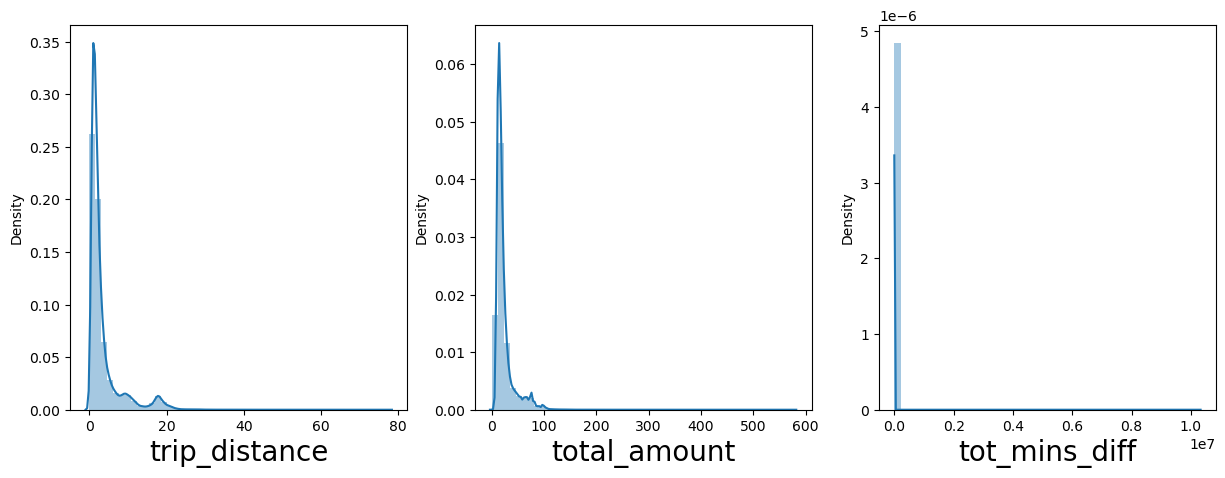

In [85]:
plt.figure(figsize=(20,5))
plotnumber=1
for i in df_ubermodel[["trip_distance","total_amount","tot_mins_diff"]]:
        ax=plt.subplot(1,4,plotnumber)
        sns.distplot(df_ubermodel[i])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
plt.show()

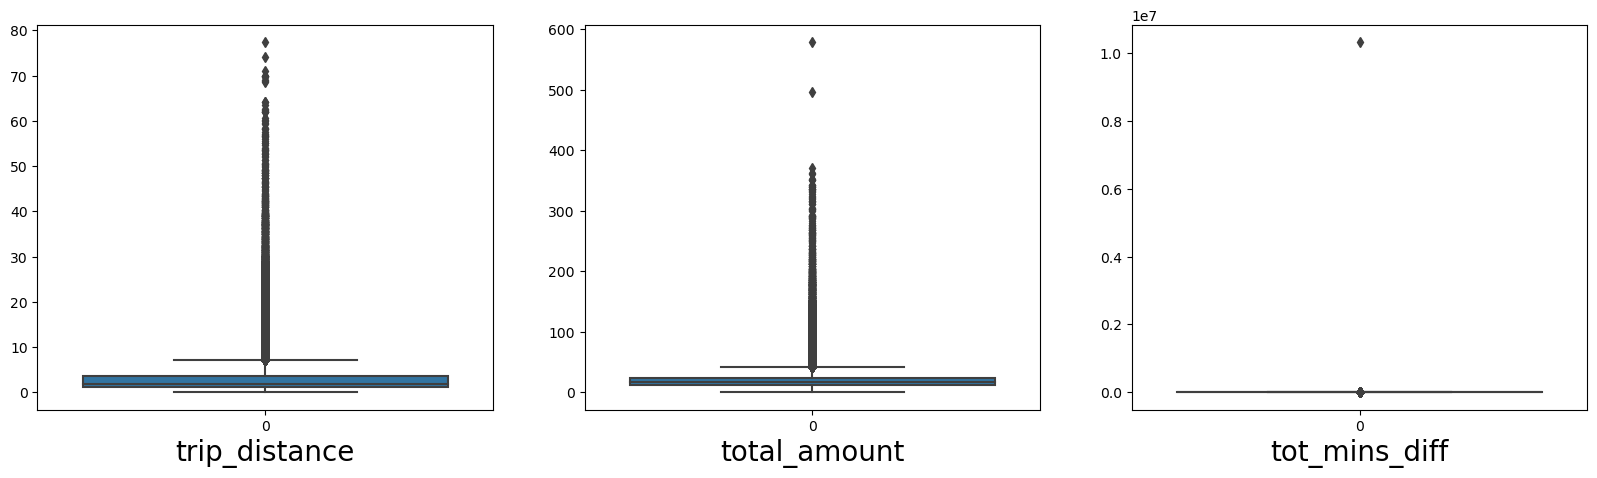

In [86]:
plt.figure(figsize=(20,5))
plotnumber=1
for i in df_ubermodel[["trip_distance","total_amount","tot_mins_diff"]]:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(df_ubermodel[i])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
plt.show()

In [87]:
df_ubermodel.loc[(df_ubermodel["tot_mins_diff"]<3)]

,passenger_count,trip_distance,total_amount,pick_hour,tot_mins_diff,cash1,creditcard2
62,3.00,0.48,11.75,1.26,1.48,1,0
113,1.00,0.44,9.12,1.04,2.48,1,0
178,1.00,0.62,7.80,0.17,2.28,1,0
186,1.00,0.41,8.50,1.13,1.28,1,0
213,1.00,0.30,9.35,1.23,2.57,1,0
...,...,...,...,...,...,...,...
490809,1.00,0.20,8.20,1.23,1.18,1,0
490816,1.00,0.50,8.20,1.59,2.72,1,0
490828,1.00,0.60,4.80,1.32,2.68,0,1
490833,2.00,0.50,10.92,1.48,2.28,1,0


In [88]:
df_ubermodel=df_ubermodel.loc[~(df_ubermodel["tot_mins_diff"]<3)]

In [89]:
df_ubermodel.loc[(df_ubermodel["tot_mins_diff"]>150) & (df_ubermodel["trip_distance"]<15)]

,passenger_count,trip_distance,total_amount,pick_hour,tot_mins_diff,cash1,creditcard2
1844,1.00,2.14,18.20,1.32,1427.37,1,0
3029,3.00,3.53,21.36,0.96,1434.00,1,0
4101,2.00,1.70,15.99,1.48,1426.12,1,0
5773,1.00,1.12,12.80,1.56,1432.17,0,1
6131,1.00,3.36,18.30,1.04,1436.60,0,1
...,...,...,...,...,...,...,...
488240,1.00,6.67,38.12,0.18,1097.60,1,0
488858,2.00,2.47,29.40,1.24,1435.62,1,0
489817,1.00,0.84,15.60,1.59,1419.15,1,0
490287,3.00,8.87,47.52,1.48,1407.20,1,0


In [90]:
df_ubermodel=df_ubermodel.loc[~((df_ubermodel["tot_mins_diff"]>150) & (df_ubermodel["trip_distance"]<15))]

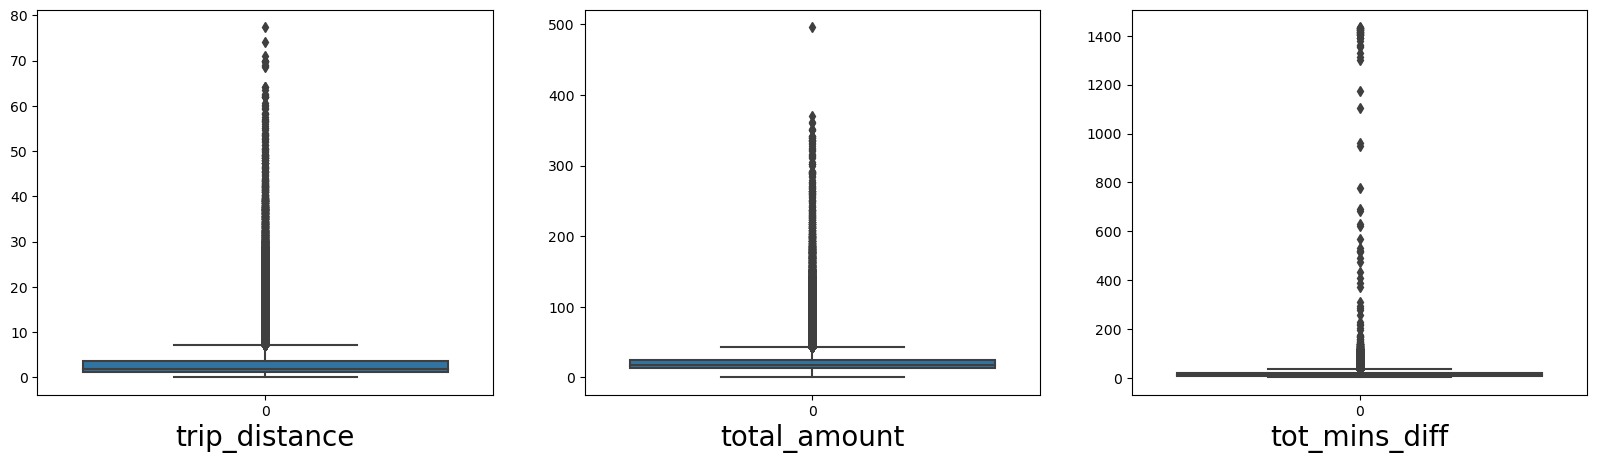

In [91]:
plt.figure(figsize=(20,5))
plotnumber=1
for i in df_ubermodel[["trip_distance","total_amount","tot_mins_diff"]]:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(df_ubermodel[i])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
plt.show()

In [92]:
df_ubermodel=df_ubermodel.loc[~(df_ubermodel["tot_mins_diff"]>200)]

In [93]:
dfmodel=df_ubermodel.loc[~((df_ubermodel["tot_mins_diff"]>100) & (df_ubermodel["trip_distance"]<5))]

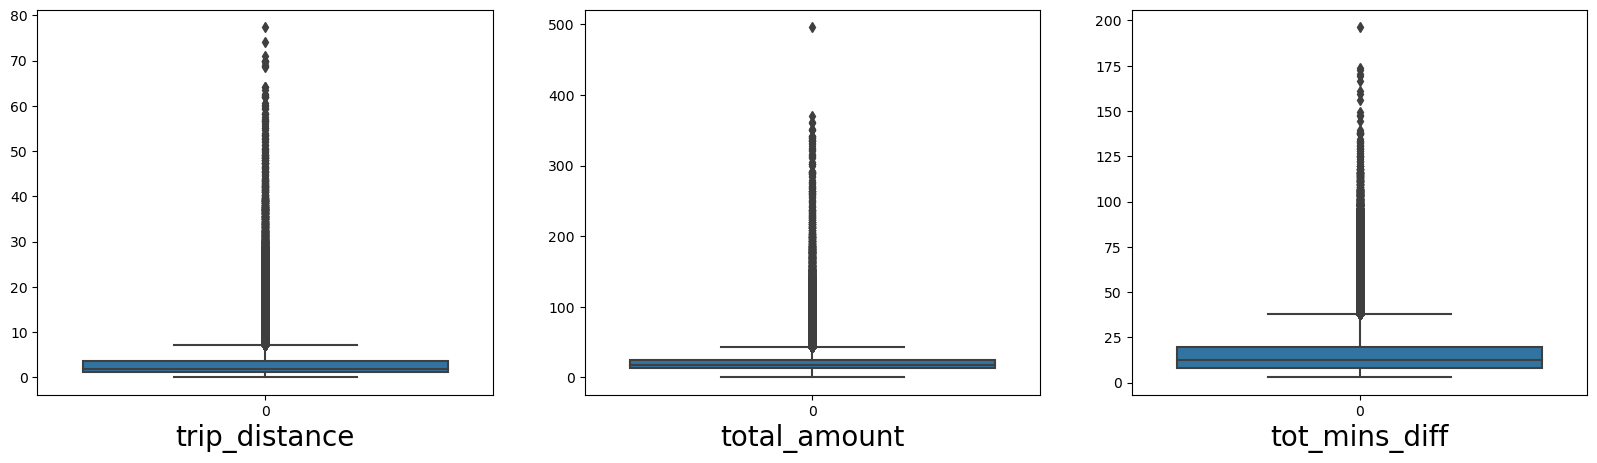

In [94]:
plt.figure(figsize=(20,5))
plotnumber=1
for i in dfmodel[["trip_distance","total_amount","tot_mins_diff"]]:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(dfmodel[i])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
plt.show()

In [95]:
dfmodel=dfmodel.loc[~((dfmodel["total_amount"]>200) & (dfmodel["trip_distance"]<35))]

In [96]:
dfmodel=dfmodel.loc[~((dfmodel["total_amount"]>300) & (dfmodel["trip_distance"]<=50))]

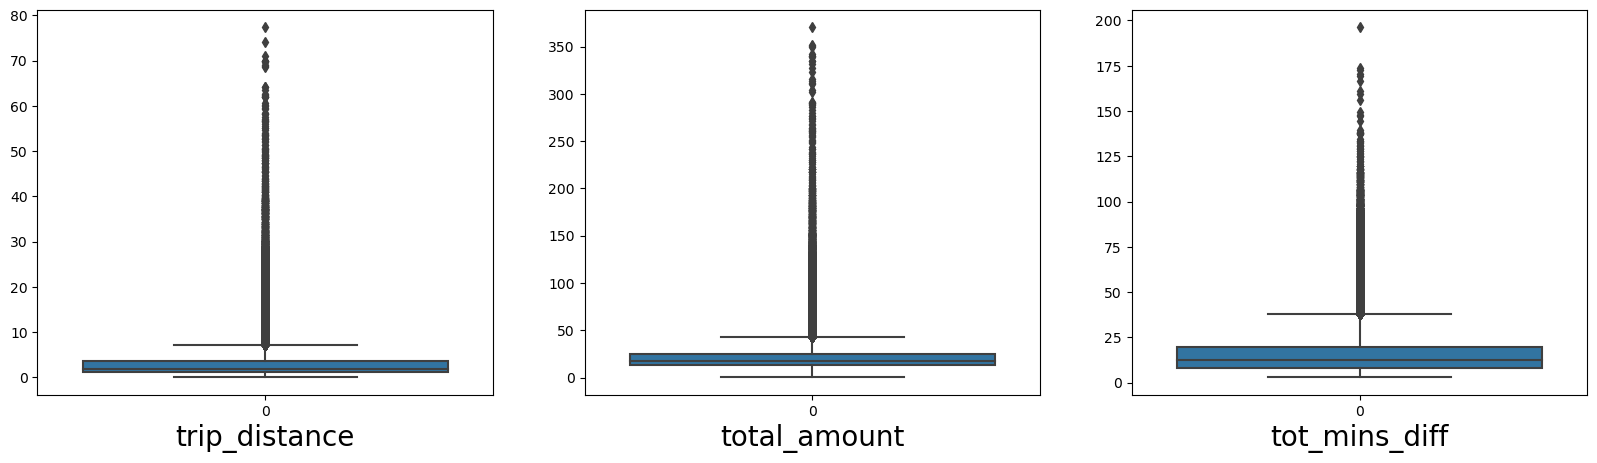

In [97]:
plt.figure(figsize=(20,5))
plotnumber=1
for i in dfmodel[["trip_distance","total_amount","tot_mins_diff"]]:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(dfmodel[i])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
plt.show()

In [98]:
dfmodel=dfmodel.loc[~((dfmodel["tot_mins_diff"]>100)&(dfmodel["trip_distance"]<10))]

In [99]:
dfmodel.head()

,passenger_count,trip_distance,total_amount,pick_hour,tot_mins_diff,cash1,creditcard2
0,1.00,2.50,19.75,1.13,15.72,1,0
1,1.00,2.00,18.95,1.04,17.35,1,0
2,1.00,3.40,22.55,1.59,19.80,1,0
3,1.00,1.28,11.30,0.40,7.82,0,1
4,1.00,8.42,41.21,0.63,40.55,1,0


# MODEL BUILDING

In [100]:
dfmodel.head()

,passenger_count,trip_distance,total_amount,pick_hour,tot_mins_diff,cash1,creditcard2
0,1.00,2.50,19.75,1.13,15.72,1,0
1,1.00,2.00,18.95,1.04,17.35,1,0
2,1.00,3.40,22.55,1.59,19.80,1,0
3,1.00,1.28,11.30,0.40,7.82,0,1
4,1.00,8.42,41.21,0.63,40.55,1,0


In [101]:
x=dfmodel.drop(["total_amount"],axis=1)

In [102]:
y=dfmodel["total_amount"]

In [103]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [104]:
import pickle

In [130]:
 model = {
'decision_tree': {'model': DecisionTreeRegressor(),'params': {'max_depth' :[3,5,10,15,20,25,30,35,40,45,50] ,'splitter': ['best','random']}},           
    }

In [131]:
model

{'decision_tree': {'model': DecisionTreeRegressor(),
  'params': {'max_depth': [3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
   'splitter': ['best', 'random']}}}

In [132]:
def find_best_model_using_gridsearchcv(x,y):

    scores = []
    cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
    for model_name, config in model.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        # Save the results of each model to a separate pickle file
        with open(f'{model_name}_result.pkl', 'wb') as file:
            pickle.dump(gs.cv_results_, file)

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [133]:
export_model_result = find_best_model_using_gridsearchcv(x,y)

In [134]:
export_model_result

,model,best_score,best_params
0,decision_tree,0.88,"{'max_depth': 10, 'splitter': 'best'}"


In [105]:
model= DecisionTreeRegressor()

In [106]:
model.fit(x,y)

DecisionTreeRegressor()

In [107]:
x

,passenger_count,trip_distance,pick_hour,tot_mins_diff,cash1,creditcard2
0,1.00,2.50,1.13,15.72,1,0
1,1.00,2.00,1.04,17.35,1,0
2,1.00,3.40,1.59,19.80,1,0
3,1.00,1.28,0.40,7.82,0,1
4,1.00,8.42,0.63,40.55,1,0
...,...,...,...,...,...,...
490936,1.00,3.22,1.13,17.00,1,0
490937,1.00,1.84,1.13,12.47,1,0
490938,1.00,3.15,1.17,9.18,1,0
490939,1.00,1.50,1.48,10.20,1,0


In [108]:
y

0        19.75
1        18.95
2        22.55
3        11.30
4        41.21
          ... 
490936   26.88
490937   21.84
490938   22.38
490939   11.80
490940   17.80
Name: total_amount, Length: 468515, dtype: float64

In [146]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\ruchir\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: category-encoders, daal4py, dtreeviz, imbalanced-learn, lightgbm, mlxtend, pmdarima, pycaret, pyod, scikit-learn-intelex, scikit-plot, sktime, tbats, yellowbrick
Note: you may need to restart the kernel to use updated packages.


In [145]:
import os
os.getcwd()

'C:\\Users\\RUCHIR\\Desktop\\UBER_FARE_PREDICTION\\UBER_DATA'

In [144]:
import pickle
pickle.dump(model,open("decisiontree.pkl","wb"))

In [141]:
rf=RandomForestRegressor(max_samples=.7,n_estimators=100,n_jobs=-1)

In [111]:
model=rf.fit(x,y)

In [112]:
model.feature_importances_*100

array([ 0.68719476, 88.05699656,  2.01933909,  8.00514497,  0.84693399,
        0.38439064])

In [ ]:
data_given=[]
for i in range(1):
    passenger_count=int(input("enter ur passenger"))
    trip_distance=int(input("enter distance"))
    time_taken=int(input("enter time taken"))
    payment_mode1=int(input("enter ur paymnet"))
    payment_mode2=int(input("enter ur payment"))
    pick_hour=float(input("enter ur pick hour"))
    data_given.append([passenger_count,trip_distance,pick_hour,time_taken,payment_mode1,payment_mode2])

In [114]:
print("predicted fare of ride {} $".format(round(model.predict(data_given)[0]),2))

predicted fare of ride 303 $


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [ ]:
regressor=Sequential()
regressor.add(Dense(units=14,activation="relu"))
regressor.add(Dense(units=10,activation="ELU"))
regressor.add(Dense(units=1,activation="linear"))
regressor.compile(optimizer='adam',loss="mean_absolute_error")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train.shape[0]*.67/10

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=0)

In [ ]:
model=regressor.fit(X_train,y_train,validation_split=.33,batch_size=10,epochs=20)